+.3Preprocessing

In [3]:
# Install imbalanced-learn for SMOTE
!pip install imbalanced-learn

# Install xgboost
!pip install xgboost

Error processing line 1 of C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\vision-1.0.0-py3.11-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Gowtham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Error processing line 1 of C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\vision-1.0.0-py3.11-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Gowtham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pickle

In [8]:
# Provide the correct path to the file
df = pd.read_excel(r'c:\Users\Gowtham\OneDrive\Desktop\SEM -4 Projects\ML\Judgment_Embeddings_InLegalBERT.xlsx')
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

Dataset Shape: (3229, 769)
Columns: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_759', 'feature_760', 'feature_761', 'feature_762',
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'Label'],
      dtype='object', length=769)


In [9]:
print("Missing Values:\n", df.isnull().sum().sum())
if df.isnull().sum().sum() > 0:
    df = df.dropna()

Missing Values:
 0


In [10]:
X = df.drop(columns=["Label"])
y = df["Label"]

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize features (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.decomposition import PCA

# Reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced dimensions: {X_pca.shape[1]}")


Reduced dimensions: 288


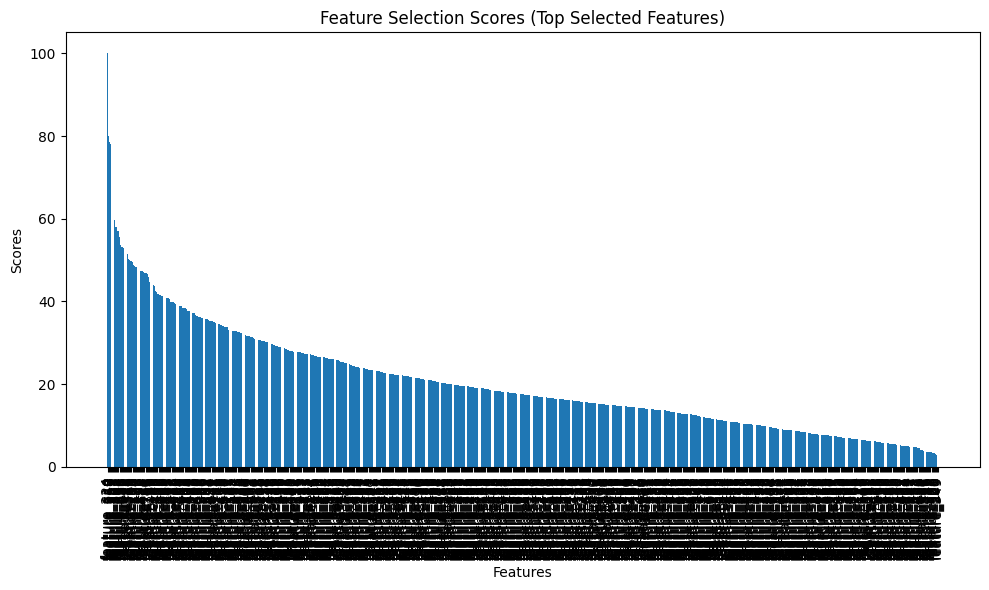

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `selector` is the SelectKBest object used for feature selection
# and `X.columns` contains the feature names
feature_scores = selector.scores_  # Get the scores for all features
selected_indices = selector.get_support(indices=True)  # Indices of selected features
selected_feature_scores = feature_scores[selected_indices]  # Scores of selected features
selected_feature_names = X.columns[selected_indices]  # Names of selected features

# Sort features by score for better visualization
sorted_indices = np.argsort(selected_feature_scores)[::-1]
sorted_scores = selected_feature_scores[sorted_indices]
sorted_features = selected_feature_names[sorted_indices]

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_scores, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Feature Selection Scores (Top Selected Features)")
plt.tight_layout()
plt.show()

XGBoost and Logistic Regression(Without smote)

🔹 Logistic Regression (Without SMOTE):
Training Accuracy: 0.7824235385210995
Testing Accuracy: 0.718266253869969


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.67      0.86      0.75       273
           1       0.80      0.80      0.80       123
           2       0.73      0.73      0.73        74
           3       0.00      0.00      0.00         2
           4       0.50      0.33      0.40        24
           5       0.00      0.00      0.00        22
           6       0.94      0.92      0.93        53
           7       0.00      0.00      0.00         1
           8       0.75      0.20      0.32        15
           9       0.63      0.27      0.38        44
          10       0.00      0.00      0.00         2
          11       0.80      0.67      0.73         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.72       646
   macro avg       0.42      0.34      0.36       646
weighted avg       0.68      0.72      0.69      

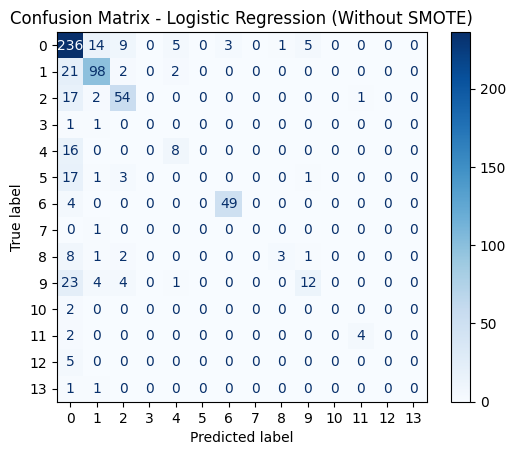


🔹 XGBoost (Without SMOTE):
Training Accuracy: 0.9980642663569493
Testing Accuracy: 0.6919504643962848


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.63      0.87      0.73       273
           1       0.85      0.73      0.79       123
           2       0.73      0.78      0.76        74
           3       0.00      0.00      0.00         2
           4       0.56      0.21      0.30        24
           5       0.00      0.00      0.00        22
           6       0.92      0.85      0.88        53
           7       0.00      0.00      0.00         1
           8       0.75      0.20      0.32        15
           9       0.38      0.14      0.20        44
          10       0.00      0.00      0.00         2
          11       1.00      0.50      0.67         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.69       646
   macro avg       0.42      0.31      0.33       646
weighted avg       0.66      0.69      0.66      

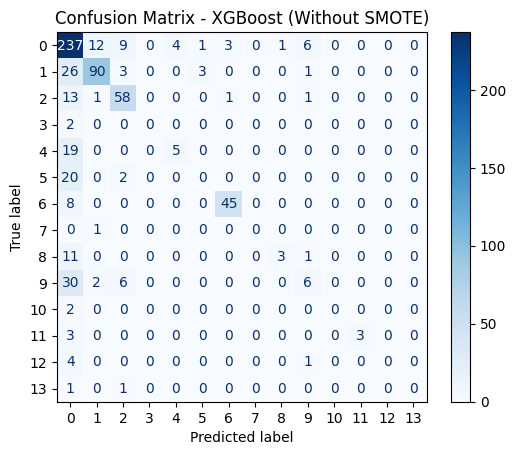

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------- 1. Logistic Regression -------------------
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("🔹 Logistic Regression (Without SMOTE):")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (Without SMOTE)")
plt.show()

# ------------------- 2. XGBoost Classifier -------------------
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost (Without SMOTE):")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost (Without SMOTE)")
plt.show()

Random Forest

Training Accuracy: 0.9980642663569493
🔹 Random Forest Results (Without SMOTE):
Testing Accuracy: 0.6842105263157895


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.59      0.96      0.73       273
           1       0.88      0.69      0.77       123
           2       0.89      0.68      0.77        74
           3       0.00      0.00      0.00         2
           4       0.75      0.12      0.21        24
           5       0.00      0.00      0.00        22
           6       0.95      0.77      0.85        53
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.68       646
   macro avg       0.29      0.23      0.24       646
weighted avg       0.62      0.68      0.62      

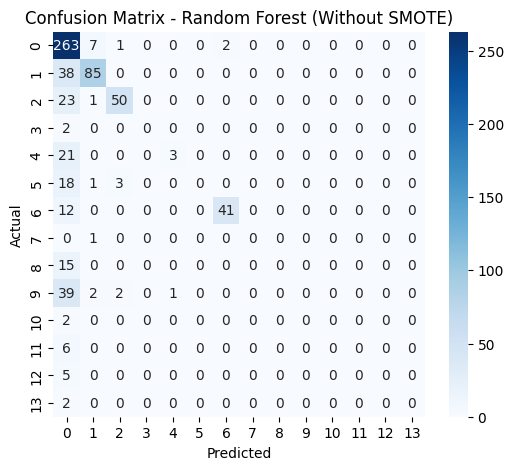

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# 🔧 Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Training accuracy using rf_model
y_train_pred_rf = rf_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))

# 🎯 Predict on test set
y_pred_rf = rf_model.predict(X_test)

# 📊 Evaluation
print("🔹 Random Forest Results (Without SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_rf))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM

Training Accuracy: 0.6554394115369725
🔹 SVM Results (Without SMOTE):
Testing Accuracy: 0.6687306501547987


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.58      0.95      0.72       273
           1       0.85      0.76      0.80       123
           2       0.82      0.50      0.62        74
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        22
           6       0.93      0.79      0.86        53
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.67       646
   macro avg       0.23      0.21      0.21       646
weighted avg       0.58      0.67      0.60      

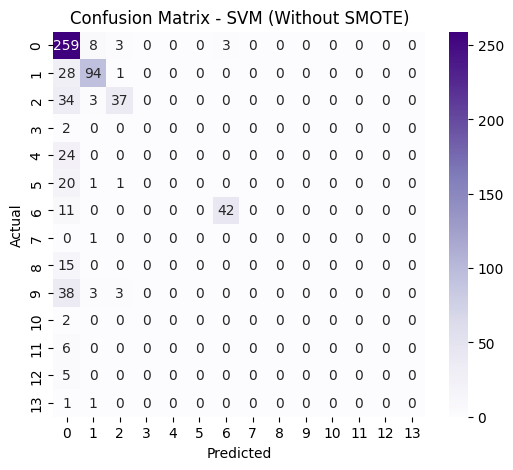

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# 🔧 Train an SVM classifier
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# ✅ Training accuracy using svm_model
y_train_pred_svm = svm_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))

# 🎯 Predict on test set
y_pred_svm = svm_model.predict(X_test)

# 📊 Evaluation
print("🔹 SVM Results (Without SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report (Test):\n", classification_report(y_test, y_pred_svm))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree

Training Accuracy: 0.9980642663569493
🔹 Decision Tree Results (Without SMOTE):
Testing Accuracy: 0.4969040247678019
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58       273
           1       0.57      0.54      0.56       123
           2       0.49      0.57      0.53        74
           3       0.00      0.00      0.00         2
           4       0.20      0.12      0.15        24
           5       0.09      0.09      0.09        22
           6       0.71      0.77      0.74        53
           7       0.00      0.00      0.00         1
           8       0.11      0.07      0.08        15
           9       0.10      0.09      0.10        44
          10       0.00      0.00      0.00         2
          11       0.33      0.17      0.22         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.50     

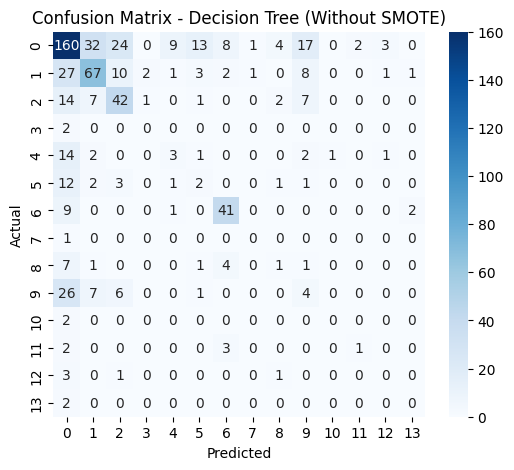

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# 🔧 Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# ✅ Training accuracy using dt_model
y_train_pred_dt = dt_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))

# 🎯 Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# 📊 Evaluate the model
print("🔹 Decision Tree Results (Without SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN

Training Accuracy: 0.7224157955865272
🔹 k-NN Results (Without SMOTE):
Testing Accuracy: 0.6486068111455109


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.85      0.72       273
           1       0.76      0.76      0.76       123
           2       0.52      0.42      0.46        74
           3       0.00      0.00      0.00         2
           4       0.55      0.25      0.34        24
           5       0.00      0.00      0.00        22
           6       0.91      0.91      0.91        53
           7       0.00      0.00      0.00         1
           8       0.67      0.13      0.22        15
           9       0.36      0.11      0.17        44
          10       0.00      0.00      0.00         2
          11       0.75      0.50      0.60         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.65       646
   macro avg       0.37      0.28      0.30       646
weighted avg       0.61      0.65      0.61       646



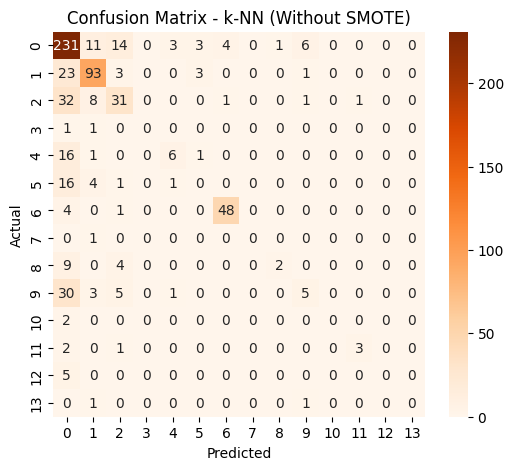

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Step 1: Initialize k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the model
knn_model.fit(X_train, y_train)

# ✅ Training accuracy using knn_model
y_train_pred_knn = knn_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_knn))

# Step 3: Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluation
print("🔹 k-NN Results (Without SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - k-NN (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

AdaBoost Classifier

C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.6171118854045683
🔹 Improved AdaBoost Results (Without SMOTE):
Testing Accuracy: 0.5356037151702786


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.93      0.65       273
           1       0.65      0.45      0.53       123
           2       0.50      0.09      0.16        74
           3       0.00      0.00      0.00         2
           4       1.00      0.04      0.08        24
           5       0.00      0.00      0.00        22
           6       0.97      0.57      0.71        53
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.54       646
   macro avg       0.26      0.15      0.15       646
weighted avg       0.51      0.54      0.45       646



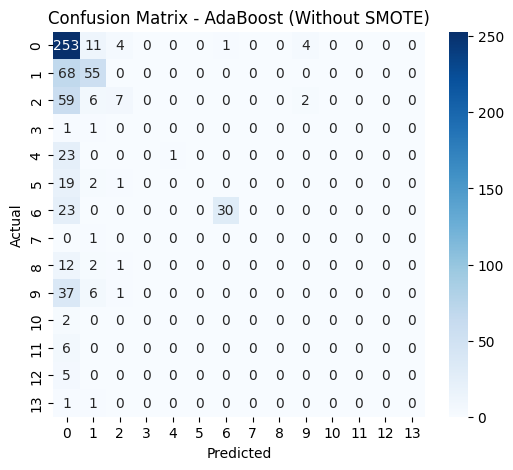

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Step 1: Initialize Improved AdaBoost
base_model = DecisionTreeClassifier(max_depth=3)  # Increased depth
adaboost_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=200,         # More boosting rounds
    learning_rate=0.5,        # Reduced learning rate
    random_state=42
)

# Step 2: Train the model
adaboost_model.fit(X_train, y_train)

# ✅ Training accuracy
y_train_pred_ada = adaboost_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_ada))

# Step 3: Predict on test set
y_pred_ada = adaboost_model.predict(X_test)

# Step 4: Evaluation
print("🔹 Improved AdaBoost Results (Without SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cat Boost

Training Accuracy: 0.7859078590785907
🔹 CatBoost Results (Without SMOTE):
Testing Accuracy: 0.6578947368421053


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.91      0.71       273
           1       0.84      0.71      0.77       123
           2       0.64      0.55      0.59        74
           3       0.00      0.00      0.00         2
           4       0.75      0.12      0.21        24
           5       0.00      0.00      0.00        22
           6       0.95      0.79      0.87        53
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        15
           9       1.00      0.09      0.17        44
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2

    accuracy                           0.66       646
   macro avg       0.34      0.23      0.24       646
weighted avg       0.65      0.66      0.60       646



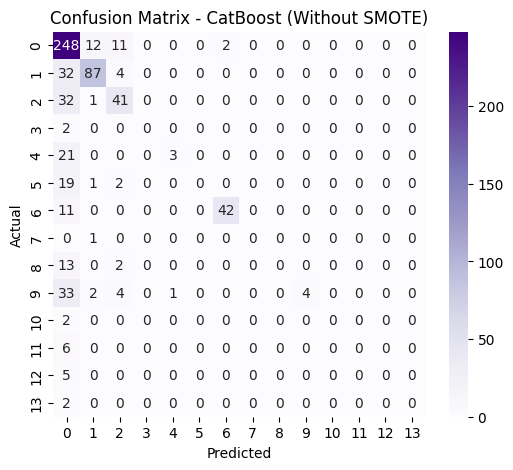

In [27]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Step 1: Initialize CatBoost (silent mode to suppress output)
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Step 2: Train the model
cat_model.fit(X_train, y_train)

# ✅ Training accuracy using cat_model
y_train_pred_cat = cat_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_cat))

# Step 3: Predict on test set
y_pred_cat = cat_model.predict(X_test)

# Step 4: Evaluation
print("🔹 CatBoost Results (Without SMOTE):")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - CatBoost (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Navie Bayes

🔹 Naive Bayes Results (Without SMOTE):
Training Accuracy: 0.49206349206349204
Testing Accuracy: 0.4938080495356037


C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gowtham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classi

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.32      0.45       273
           1       0.87      0.59      0.71       123
           2       0.48      0.70      0.57        74
           3       0.00      0.00      0.00         2
           4       0.16      0.67      0.26        24
           5       0.07      0.14      0.09        22
           6       0.92      0.89      0.90        53
           7       0.00      0.00      0.00         1
           8       0.26      0.80      0.39        15
           9       0.28      0.50      0.36        44
          10       0.00      0.00      0.00         2
          11       0.40      1.00      0.57         6
          12       0.18      0.40      0.25         5
          13       0.00      0.00      0.00         2

    accuracy                           0.49       646
   macro avg       0.32      0.43      0.33       646
weighted avg       0.67      0.49      0.52       646



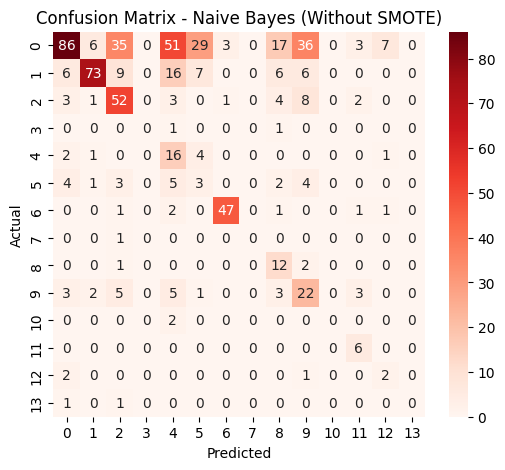

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 🧪 Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Step 1: Initialize the Naive Bayes model
nb_model = GaussianNB()

# Step 2: Train the model
nb_model.fit(X_train, y_train)

# Step 3: Predict on both training and test sets
y_train_pred_nb = nb_model.predict(X_train)
y_pred_nb = nb_model.predict(X_test)

# Step 4: Evaluation
print("🔹 Naive Bayes Results (Without SMOTE):")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Naive Bayes (Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparison

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Include predictions for models trained without SMOTE
all_model_preds = {
    "Random Forest": (y_train_pred_rf, y_pred_rf),
    "SVM": (y_train_pred_svm, y_pred_svm),
    "Decision Tree": (y_train_pred_dt, y_pred_dt),
    "k-NN": (y_train_pred_knn, y_pred_knn),
    "AdaBoost (Improved)": (y_train_pred_ada, y_pred_ada),
    "CatBoost": (y_train_pred_cat, y_pred_cat),
    "Naive Bayes": (y_train_pred_nb, y_pred_nb)
}

# 📊 Collect metrics for models without SMOTE
metrics_rows = []
for model_name, (train_pred, test_pred) in all_model_preds.items():
    row = {
        "Model": model_name,
        "Accuracy (Train)": round(accuracy_score(y_train, train_pred), 4),
        "Precision (Train)": round(precision_score(y_train, train_pred, average='weighted', zero_division=0), 4),
        "Recall (Train)": round(recall_score(y_train, train_pred, average='weighted', zero_division=0), 4),
        "F1 Score (Train)": round(f1_score(y_train, train_pred, average='weighted', zero_division=0), 4),
        "Accuracy (Test)": round(accuracy_score(y_test, test_pred), 4),
        "Precision (Test)": round(precision_score(y_test, test_pred, average='weighted', zero_division=0), 4),
        "Recall (Test)": round(recall_score(y_test, test_pred, average='weighted', zero_division=0), 4),
        "F1 Score (Test)": round(f1_score(y_test, test_pred, average='weighted', zero_division=0), 4),
    }
    metrics_rows.append(row)

# 📄 Create DataFrame
results_df = pd.DataFrame(metrics_rows)

# ✅ Display final comparison
print("📊 Final Model Performance Comparison (Without SMOTE)")
print(results_df)

📊 Final Model Performance Comparison (Without SMOTE)
                 Model  Accuracy (Train)  Precision (Train)  Recall (Train)  \
0        Random Forest            0.9981             0.9981          0.9981   
1                  SVM            0.6554             0.5514          0.6554   
2        Decision Tree            0.9981             0.9981          0.9981   
3                 k-NN            0.7224             0.7218          0.7224   
4  AdaBoost (Improved)            0.6171             0.7118          0.6171   
5             CatBoost            0.7859             0.8061          0.7859   
6          Naive Bayes            0.4921             0.6730          0.4921   

   F1 Score (Train)  Accuracy (Test)  Precision (Test)  Recall (Test)  \
0            0.9980           0.6842            0.6244         0.6842   
1            0.5841           0.6687            0.5780         0.6687   
2            0.9980           0.4969            0.4857         0.4969   
3            0.6945   

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Define a scoring metric (e.g., accuracy)
scorer = make_scorer(accuracy_score)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X_selected, y, cv=5, scoring=scorer)

# Print cross-validation results
print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Logistic Regression Cross-Validation Scores: [0.625387   0.61455108 0.64705882 0.68421053 0.67286822]
Mean CV Accuracy: 0.6488151294789641


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")

Cross-Validation Scores: [0.625387   0.61455108 0.64705882 0.68421053 0.67286822]
Mean Accuracy: 0.6488
Standard Deviation: 0.0267


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200, learning_rate=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Perform cross-validation for each model
cv_results = []
for model_name, model in models.items():
    try:
        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy', n_jobs=-1)
        mean_accuracy = cv_scores.mean()
        std_accuracy = cv_scores.std()
        
        # Append results
        cv_results.append({
            "Model": model_name,
            "Mean Accuracy": round(mean_accuracy, 4),
            "Standard Deviation": round(std_accuracy, 4)
        })
        
        print(f"{model_name}: Mean Accuracy = {mean_accuracy:.4f}, Std Dev = {std_accuracy:.4f}")
    except Exception as e:
        print(f"Error with {model_name}: {e}")

# Convert results to a DataFrame for better visualization
import pandas as pd
cv_results_df = pd.DataFrame(cv_results)

# Display the results
print("\nCross-Validation Results:")
print(cv_results_df)

Logistic Regression: Mean Accuracy = 0.6491, Std Dev = 0.0271
Random Forest: Mean Accuracy = 0.6352, Std Dev = 0.0378
SVM: Mean Accuracy = 0.6315, Std Dev = 0.0177
XGBoost: Mean Accuracy = 0.6541, Std Dev = 0.0260
k-NN: Mean Accuracy = 0.5921, Std Dev = 0.0298
Decision Tree: Mean Accuracy = 0.4286, Std Dev = 0.0274
AdaBoost: Mean Accuracy = 0.5234, Std Dev = 0.0254
CatBoost: Mean Accuracy = 0.6315, Std Dev = 0.0251
Naive Bayes: Mean Accuracy = 0.4237, Std Dev = 0.0508

Cross-Validation Results:
                 Model  Mean Accuracy  Standard Deviation
0  Logistic Regression         0.6491              0.0271
1        Random Forest         0.6352              0.0378
2                  SVM         0.6315              0.0177
3              XGBoost         0.6541              0.0260
4                 k-NN         0.5921              0.0298
5        Decision Tree         0.4286              0.0274
6             AdaBoost         0.5234              0.0254
7             CatBoost         0.631

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Define models and their hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "k-NN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0, random_state=42),
        "params": {
            "iterations": [50, 100, 200],
            "depth": [4, 6, 8],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    }
}

# Perform GridSearchCV for each model
tuned_results = []
for model_name, model_info in param_grids.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        scoring="accuracy",
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_selected, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    tuned_results.append({
        "Model": model_name,
        "Best Parameters": best_params,
        "Best Accuracy": round(best_score, 4)
    })
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Accuracy for {model_name}: {best_score:.4f}")

# Convert results to a DataFrame for better visualization
import pandas as pd
tuned_results_df = pd.DataFrame(tuned_results)

# Display the results
print("\nHyperparameter Tuning Results:")
print(tuned_results_df)

KeyboardInterrupt: 

ImportError: numpy._core.multiarray failed to import